In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('/Users/belluscher/Library/CloudStorage/OneDrive-Pessoal/A_IRONHACK/Week_5/Labs/amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [12]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
print(crosstab_result)

isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [3]:
crosstab_result['Proportion_B_S'] = crosstab_result[True]
crosstab_result.sort_values('Proportion_B_S', ascending=False)

isBestSeller,False,True,Proportion_B_S
category,,,
Grocery,0.941865,0.058135,0.058135
Smart Home Security & Lighting,0.942308,0.057692,0.057692
Health & Personal Care,0.942314,0.057686,0.057686
Mobile Phone Accessories,0.957529,0.042471,0.042471
Power & Hand Tools,0.964661,0.035339,0.035339
...,...,...,...
"CD, Disc & Tape Players",1.000000,0.000000,0.000000
General Music-Making Accessories,1.000000,0.000000,0.000000
Snowboard Boots,1.000000,0.000000,0.000000


In [4]:
# Grocery, Smart Home Security & Lighting and Smart Home Security & Lighting have more prevalence of being Best Sellers.

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

Compute Cramér's V to understand the strength of association between best-seller status and category.

In [5]:
from scipy.stats import chi2_contingency

# Chi-square test for 'isBestSeller' and 'category'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(7.585522525617055, 1.0)

In [6]:
# Since p value is greater than 0,05 the association bettween Category and Is Best Seller is not relevant

In [13]:
from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

0.1222829439760564

Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='isBestSeller'>

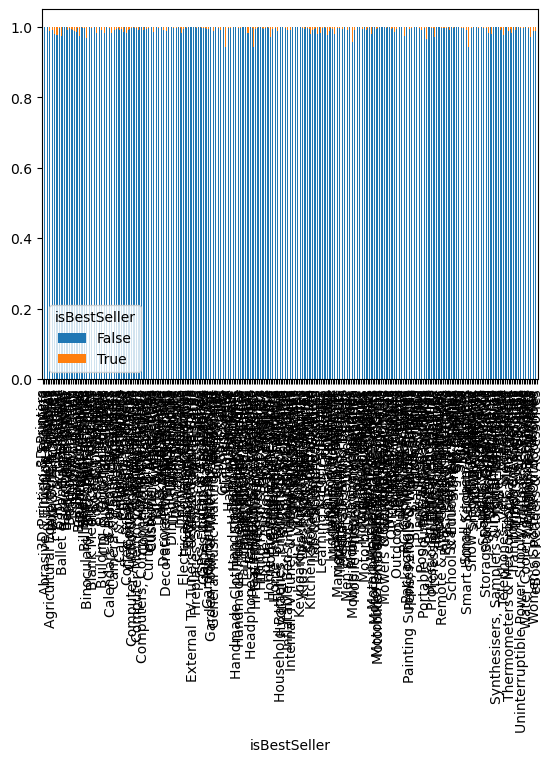

In [56]:
crosstab_result.plot(kind="bar", xlabel='isBestSeller', stacked=True)

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

Which product category tends to have the highest median price? Don't filter here by top categories.


In [16]:
data = df
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)].index
    
    return outliers

outliers = tukeys_test_outliers(df['price'])
outliers

df_cleaned = df.drop(outliers)
df_cleaned.sort_values('price', ascending=False)
df_cleaned.value_counts()
#df_cleaned.to_excel('total_time_completed_no_outliers.xlsx', index=False)
df_cleaned

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


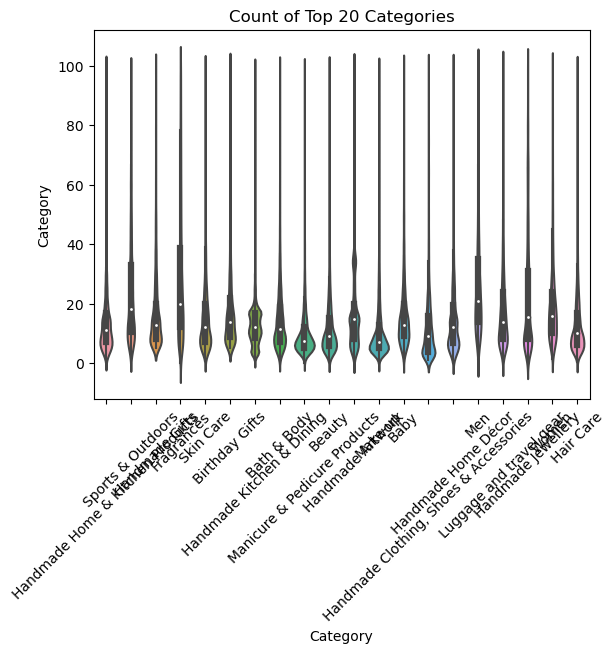

In [70]:
top_20_categories = df_cleaned['category'].value_counts().sort_values(ascending=False).head(20).index
sns.violinplot(data=df_cleaned[df_cleaned['category'].isin(top_20_categories)], x='category', y="price")

plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Category')
plt.title('Count of Top 20 Categories')
plt.show()

In [77]:
crosstab_result = pd.crosstab(df_cleaned['price'], df_cleaned['category'])
crosstab_result

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,...,Uninterruptible Power Supply Units & Accessories,Vacuums & Floorcare,Vases,"Water Coolers, Filters & Cartridges",Wearable Technology,Wind Instruments,Window Treatments,Women,Women's Sports & Outdoor Shoes,eBook Readers & Accessories
price,,,,,,,,,,,,,,,,,,,,,
0.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99.95,0,0,0,0,0,3,0,0,0,0,...,0,3,0,0,2,0,0,0,0,0
99.96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
99.97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [80]:
#Which product category tends to have the highest median price? Don't filter here by top categories.
df_cleaned.groupby(['category']).agg(median = ("price", "median")).sort_values("median", ascending=False)
# Desktop PCs

,median
category,
Desktop PCs,74.00
Boxing Shoes,69.79
Tablets,69.00
Graphics Cards,68.54
Motherboards,67.92
...,...
Adapters,7.05
Make-up,7.00
Signs & Plaques,6.99


Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

Which product category commands the highest average price? Don't filter here by top categories.


In [112]:
top_10_products = df_cleaned['category'].value_counts().head(10)
top_10_products

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Name: count, dtype: int64

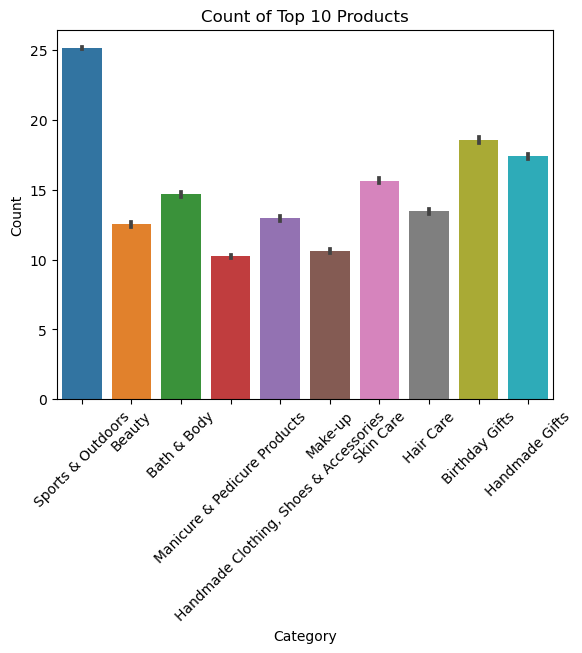

In [123]:
top_10_products = df_cleaned['category'].value_counts().head(10)
sns.barplot(data=df_cleaned[df_cleaned['category'].isin(top_10_products.index)], x='category', y = "price", order=top_10_products.index)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Top 10 Products')
plt.show()
#Sports $ Outdoors tend to have the biggest average price.

Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. 

Filter out the top 10 categories based on count for better visualization.

Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

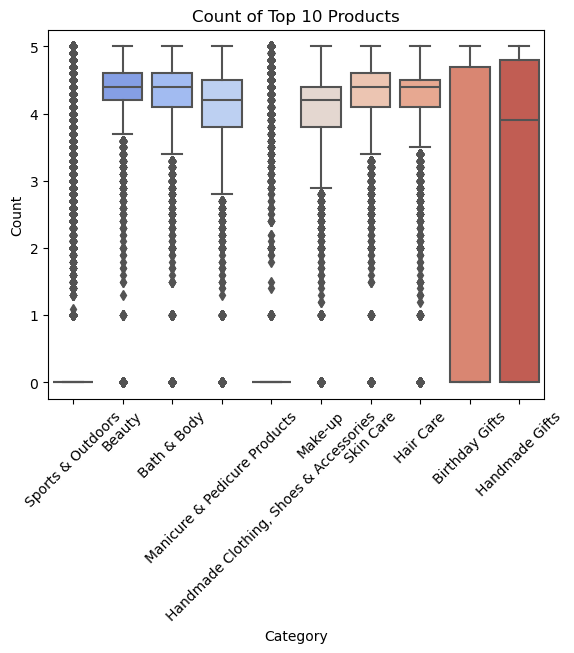

In [126]:
top_10_products = df_cleaned['category'].value_counts().head(10)
sns.boxplot(data=df_cleaned[df_cleaned['category'].isin(top_10_products.index)], x='category', y = "stars", order=top_10_products.index, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Top 10 Products')
plt.show()

In [131]:
df_cleaned.groupby(['category']).agg(median = ("stars", "median")).sort_values("median", ascending=False)
#Computer Memory has the highest median rating

,median
category,
Computer Memory,4.7
Building & Construction Toys,4.6
Office Paper Products,4.6
Luxury Food & Drink,4.6
Kids' Play Figures,4.6
...,...
Hockey Shoes,0.0
Hi-Fi Receivers & Separates,0.0
Handmade Kitchen & Dining,0.0


Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.

Is there a significant correlation between product price and its rating?


In [132]:
crosstab_result = pd.crosstab(df_cleaned['price'], df_cleaned['stars'])
crosstab_result

stars,0.0,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
price,,,,,,,,,,,,,,,,,,,,,
0.00,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,5,7,2,0,1
0.01,613,5,0,0,0,0,1,0,0,0,...,4,2,2,0,0,5,1,1,0,18
0.02,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.03,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.04,12,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99.95,101,5,0,0,0,1,0,0,0,0,...,12,27,29,41,55,33,37,15,6,41
99.96,23,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,0,3,0,0,1
99.97,18,0,0,0,0,0,0,0,0,0,...,0,3,1,5,7,7,0,1,0,2


In [133]:
from scipy.stats import chi2_contingency

# Chi-square test for 'price' and 'stars'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value 
#There is a significant correlation between price and rating, given by the p value lower than 0,05

(662382.0835902254, 0.0)

Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

Use a correlation heatmap to visualize correlations between all numerical variables.

Examine if product prices typically follow a normal distribution using a QQ plot.


<Axes: xlabel='price', ylabel='stars'>

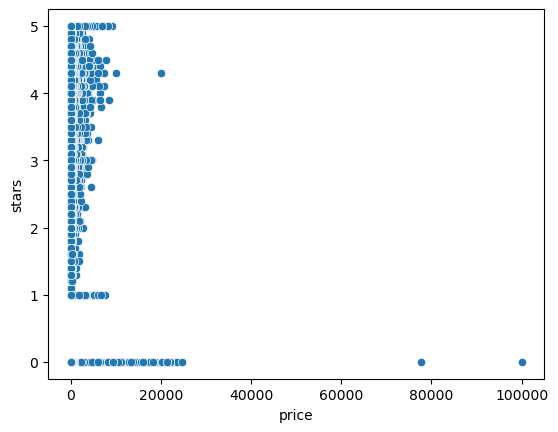

In [135]:
sns.scatterplot(data=df, x='price', y='stars')

<Axes: xlabel='stars', ylabel='price'>

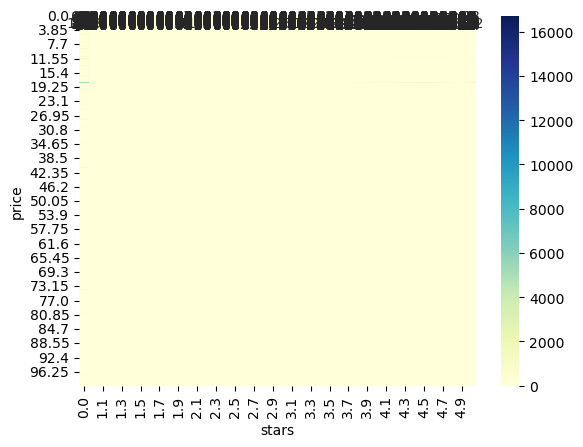

In [136]:
sns.heatmap(crosstab_result, annot=True, cmap="YlGnBu", fmt="d")

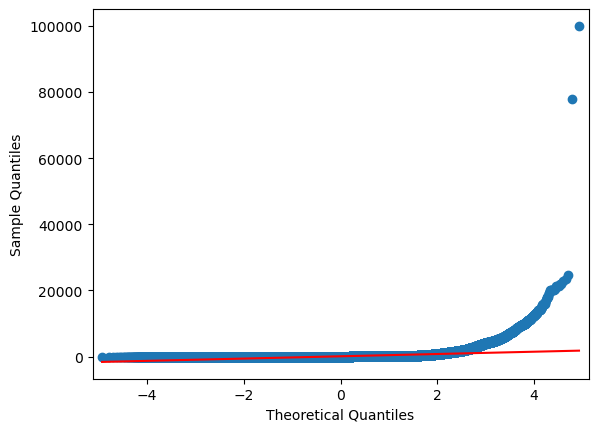

In [138]:
import statsmodels.api as sm
sm.qqplot(df['price'], line='s');

In [ ]:
# The upper tail (right side of the plot), the data points deviate significantly from the red line, suggesting a long tail or skewness to the right. This indicates that there are more extreme high values in `price` than would be expected in a normal distribution.